# Tarea#4_Cardenas_Venegas
            diciembre 9, 2022
 ##  SEM 
 Autores : David Càrdenas y Cristobal Venegas

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Limpieza de datos

In [2]:
junaeb2 = pd.read_csv("C:/Users/crist/Documents/GitHub/LAB-MAA_1/data/junaeb2.csv")

In [3]:
junaeb2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sexo        59999 non-null  int64  
 1   edad        59999 non-null  int64  
 2   imce        59999 non-null  float64
 3   vive_padre  59999 non-null  int64  
 4   vive_madre  59999 non-null  int64  
 5   sk1         59999 non-null  int64  
 6   sk2         59999 non-null  int64  
 7   sk3         59999 non-null  int64  
 8   sk4         59999 non-null  int64  
 9   sk5         59999 non-null  int64  
 10  sk6         59999 non-null  int64  
 11  sk7         59999 non-null  int64  
 12  sk8         59999 non-null  int64  
 13  sk9         59999 non-null  int64  
 14  sk10        59999 non-null  int64  
 15  sk11        59999 non-null  int64  
 16  sk12        59999 non-null  int64  
 17  sk13        59999 non-null  int64  
 18  act_fisica  58033 non-null  float64
 19  area        59999 non-nul

In [4]:
junaeb2.isnull().sum().sort_values(ascending=False)

act_fisica    1966
educm          721
sexo             0
sk8              0
educp            0
area             0
sk13             0
sk12             0
sk11             0
sk10             0
sk9              0
sk7              0
edad             0
sk6              0
sk5              0
sk4              0
sk3              0
sk2              0
sk1              0
vive_madre       0
vive_padre       0
imce             0
madre_work       0
dtype: int64

In [5]:
junaeb2.dropna(inplace=True)

In [6]:
print ("La variable vive_padre:",junaeb2["vive_padre"].unique(),"\n","La variable vive_madre:",junaeb2["vive_madre"].unique())

La variable vive_padre: [0 1 2] 
 La variable vive_madre: [1 0 2]


In [7]:
junaeb2.drop(junaeb2.loc[junaeb2.vive_madre==2].index,inplace=True)
junaeb2.drop(junaeb2.loc[junaeb2.vive_padre==2].index,inplace=True)

 0.74    208
 1.07    197
 0.87    197
 0.73    195
 0.39    195
        ... 
-3.35      1
-4.36      1
-4.66      1
-3.17      1
-4.88      1
Name: imce, Length: 928, dtype: int64

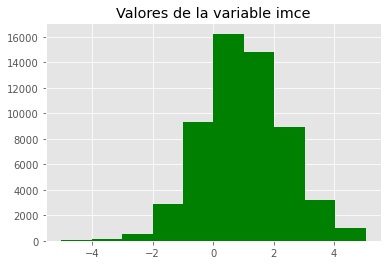

In [8]:
plt.hist(junaeb2['imce'],color="green")
plt.title("Valores de la variable imce")
junaeb2.imce.value_counts()

In [9]:
junaeb2.drop(junaeb2[junaeb2['imce']<0].index,inplace =True)
junaeb2.reset_index(drop=True, inplace=True)

In [10]:
junaeb2.reset_index(drop=False,inplace=True)


In [11]:
junaeb2.drop(columns=["index"],inplace=True)

In [12]:
junaeb2.describe()

,sexo,edad,imce,vive_padre,vive_madre,sk1,sk2,sk3,sk4,sk5,...,sk9,sk10,sk11,sk12,sk13,act_fisica,area,educm,educp,madre_work
count,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,...,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000
mean,0.536628,81.851759,1.530314,0.719765,0.974338,1.103950,1.380140,1.252168,1.243135,1.264595,...,1.318862,1.846748,1.372118,1.491708,1.684936,2.556537,0.903465,13.066784,12.943890,0.107388
std,0.498662,3.746846,1.039939,0.449119,0.158126,0.370878,0.643232,0.570744,0.557179,0.559275,...,0.646841,0.931544,0.652692,0.790304,0.978241,1.066804,0.295327,3.319058,3.413612,0.940916
min,0.000000,62.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,80.000000,0.700000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,12.000000,11.000000,-1.000000
50%,1.000000,81.000000,1.360000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,13.000000,13.000000,1.000000
75%,1.000000,83.000000,2.200000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,15.000000,14.000000,1.000000
max,1.000000,107.000000,5.040000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,22.000000,22.000000,1.000000


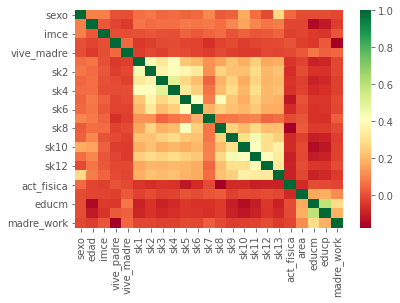

In [13]:
sns.heatmap(junaeb2.corr(), cmap='RdYlGn') 

# PCA

In [14]:
var_sk = junaeb2[["sk1","sk2","sk3","sk4","sk5","sk6","sk7","sk8","sk9","sk10","sk11","sk12","sk13"]]
pca = PCA(n_components=12)
pca_features = pca.fit_transform(var_sk)
print(pca.explained_variance_ratio_)

[0.28606755 0.18817514 0.09973579 0.07929705 0.06632621 0.06471883
 0.05164867 0.0437851  0.03238106 0.0294521  0.02499784 0.02101661]


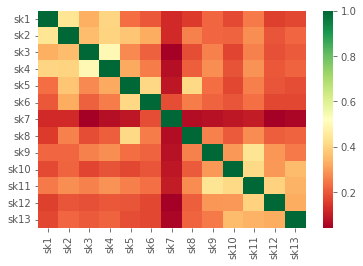

In [15]:
sns.heatmap(var_sk.corr(), cmap='RdYlGn') 

In [16]:

pca.explained_variance_ratio_[0:7].sum()

0.8359692320811097

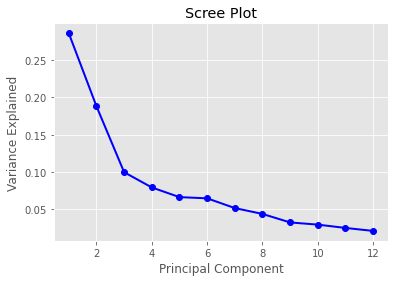

In [17]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [18]:
## Criterio scree plot
pca = PCA(n_components=7)
pca_features = pca.fit_transform(var_sk)
print(pca.explained_variance_ratio_,"\n","Varianza acumulada o explicada por los primeros 7 componentes:" , pca.explained_variance_ratio_[0:7].sum())

[0.28606755 0.18817514 0.09973579 0.07929705 0.06632621 0.06471883
 0.05164867] 
 Varianza acumulada o explicada por los primeros 7 componentes: 0.8359692320810971


In [19]:
pca_vectors = pd.DataFrame(data = pca.components_,
                          columns=var_sk.columns,
                          index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7"])
pca_vectors

,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,sk9,sk10,sk11,sk12,sk13
PC1,0.101837,0.228681,0.166704,0.180646,0.186154,0.249874,0.351651,0.291481,0.234854,0.406509,0.282787,0.293839,0.429516
PC2,0.007632,0.034134,0.066008,0.055333,0.040743,-0.028742,-0.923058,0.099394,0.086327,0.168557,0.104073,0.155922,0.236538
PC3,0.084242,0.266514,0.180453,0.191232,0.300941,0.341428,-0.115066,0.477371,0.079394,-0.373427,0.000937,-0.089114,-0.500784
PC4,-0.004360,-0.033451,-0.039866,-0.031587,-0.046156,-0.002758,-0.032316,-0.095896,0.105624,0.707258,0.138852,0.022035,-0.672875
PC5,0.143585,0.268222,0.309358,0.295992,-0.021423,0.162823,-0.030117,-0.746663,0.111445,-0.196699,0.105288,0.259159,-0.096871
PC6,-0.067635,-0.225324,-0.119334,-0.128801,-0.080588,-0.270949,0.060366,0.170746,0.160812,-0.285903,0.177867,0.786349,-0.208653
PC7,0.126372,0.153634,0.323610,0.280628,-0.104650,-0.766114,0.062409,0.137519,0.252963,-0.034518,0.143796,-0.263787,-0.028619


In [20]:
##Criterio MLE
pca = PCA(n_components='mle')
pca_features = pca.fit_transform(var_sk)
print(pca.explained_variance_ratio_)

[0.28606755 0.18817514 0.09973579 0.07929705 0.06632621 0.06471883
 0.05164867 0.0437851  0.03238106 0.0294521  0.02499784 0.02101661]


A continuación podemos ver los pesos relativos que indican cómo se relaciona cada variable con los factores.

In [21]:
pca_vectors = pd.DataFrame(data = pca.components_,
                          columns=var_sk.columns,
                          index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
pca_vectors

,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,sk9,sk10,sk11,sk12,sk13
PC1,0.101837,0.228681,0.166704,0.180646,0.186154,0.249874,0.351651,0.291481,0.234854,0.406509,0.282787,0.293839,0.429516
PC2,0.007632,0.034134,0.066008,0.055333,0.040743,-0.028742,-0.923058,0.099394,0.086327,0.168557,0.104073,0.155922,0.236538
PC3,0.084242,0.266514,0.180453,0.191232,0.300941,0.341428,-0.115066,0.477371,0.079394,-0.373427,0.000937,-0.089114,-0.500784
PC4,-0.004360,-0.033451,-0.039866,-0.031587,-0.046156,-0.002758,-0.032316,-0.095896,0.105624,0.707258,0.138852,0.022035,-0.672875
PC5,0.143585,0.268222,0.309358,0.295992,-0.021423,0.162823,-0.030117,-0.746663,0.111445,-0.196699,0.105288,0.259159,-0.096871
PC6,-0.067635,-0.225324,-0.119334,-0.128801,-0.080588,-0.270949,0.060366,0.170746,0.160812,-0.285903,0.177867,0.786349,-0.208653
PC7,0.126372,0.153634,0.323610,0.280628,-0.104650,-0.766114,0.062409,0.137519,0.252963,-0.034518,0.143796,-0.263787,-0.028619
PC8,-0.083487,-0.369391,-0.111712,-0.102811,-0.059411,0.234186,-0.018771,-0.099978,0.714193,-0.170784,0.344654,-0.324104,0.041722
PC9,0.070733,0.635989,-0.502211,-0.330848,-0.003236,-0.103672,-0.024518,-0.067178,-0.042230,-0.102105,0.438945,-0.089894,-0.001708
PC10,0.039149,0.329636,-0.192834,-0.120983,-0.030850,-0.046499,-0.002360,-0.011806,0.550689,0.069338,-0.716713,0.112230,0.019667


## Importancia relativa de las variables sobre cada componente

Se puede apreciar segun el dataframe pca_vectors que :
- Para PC1 las variables mas importantes en cuanto a peso relativo son : sk13 , sk10 ,sk7
- para PC2 las variables mas importante son : sk7, sk13,sk10,sk12,sk11

Podria concluirse que hay variables que tienen mayor peso sobre un componente que otras , indicando que ese grupo de variables podrian pertenecer a un factor como veremos mas adelante

Segun el criterio MLE el numero optimo de componentes es 12 , sin embargo si visualizamos el scree plot hay un momento en que la pendiente comienza a ser mas plana y no tan inclinada por lo que podria decirse segun el grafico que podria trabajarse con 7 componentes principales explicando un total acumulado de 0.835788847140444 de la varianza total

La descripción de cada componente se muestra a continuación. 

In [22]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3',"PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
count,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000
std,1.464,1.187,0.864,0.771,0.705,0.696,0.622,0.573,0.492,0.470,0.433,0.397
min,-1.910,-3.208,-4.086,-3.485,-3.926,-3.496,-3.943,-4.363,-4.163,-3.469,-2.495,-3.101
25%,-1.100,-0.714,-0.465,-0.255,-0.299,-0.400,-0.311,-0.289,-0.212,-0.116,-0.221,-0.062
50%,-0.260,0.185,-0.002,-0.097,0.094,0.018,0.065,0.026,-0.016,-0.038,0.051,0.021
75%,0.790,0.809,0.454,0.514,0.346,0.283,0.315,0.191,0.202,0.189,0.113,0.047
max,10.878,4.703,5.779,3.710,4.752,4.718,4.730,5.275,4.471,3.543,3.841,3.208


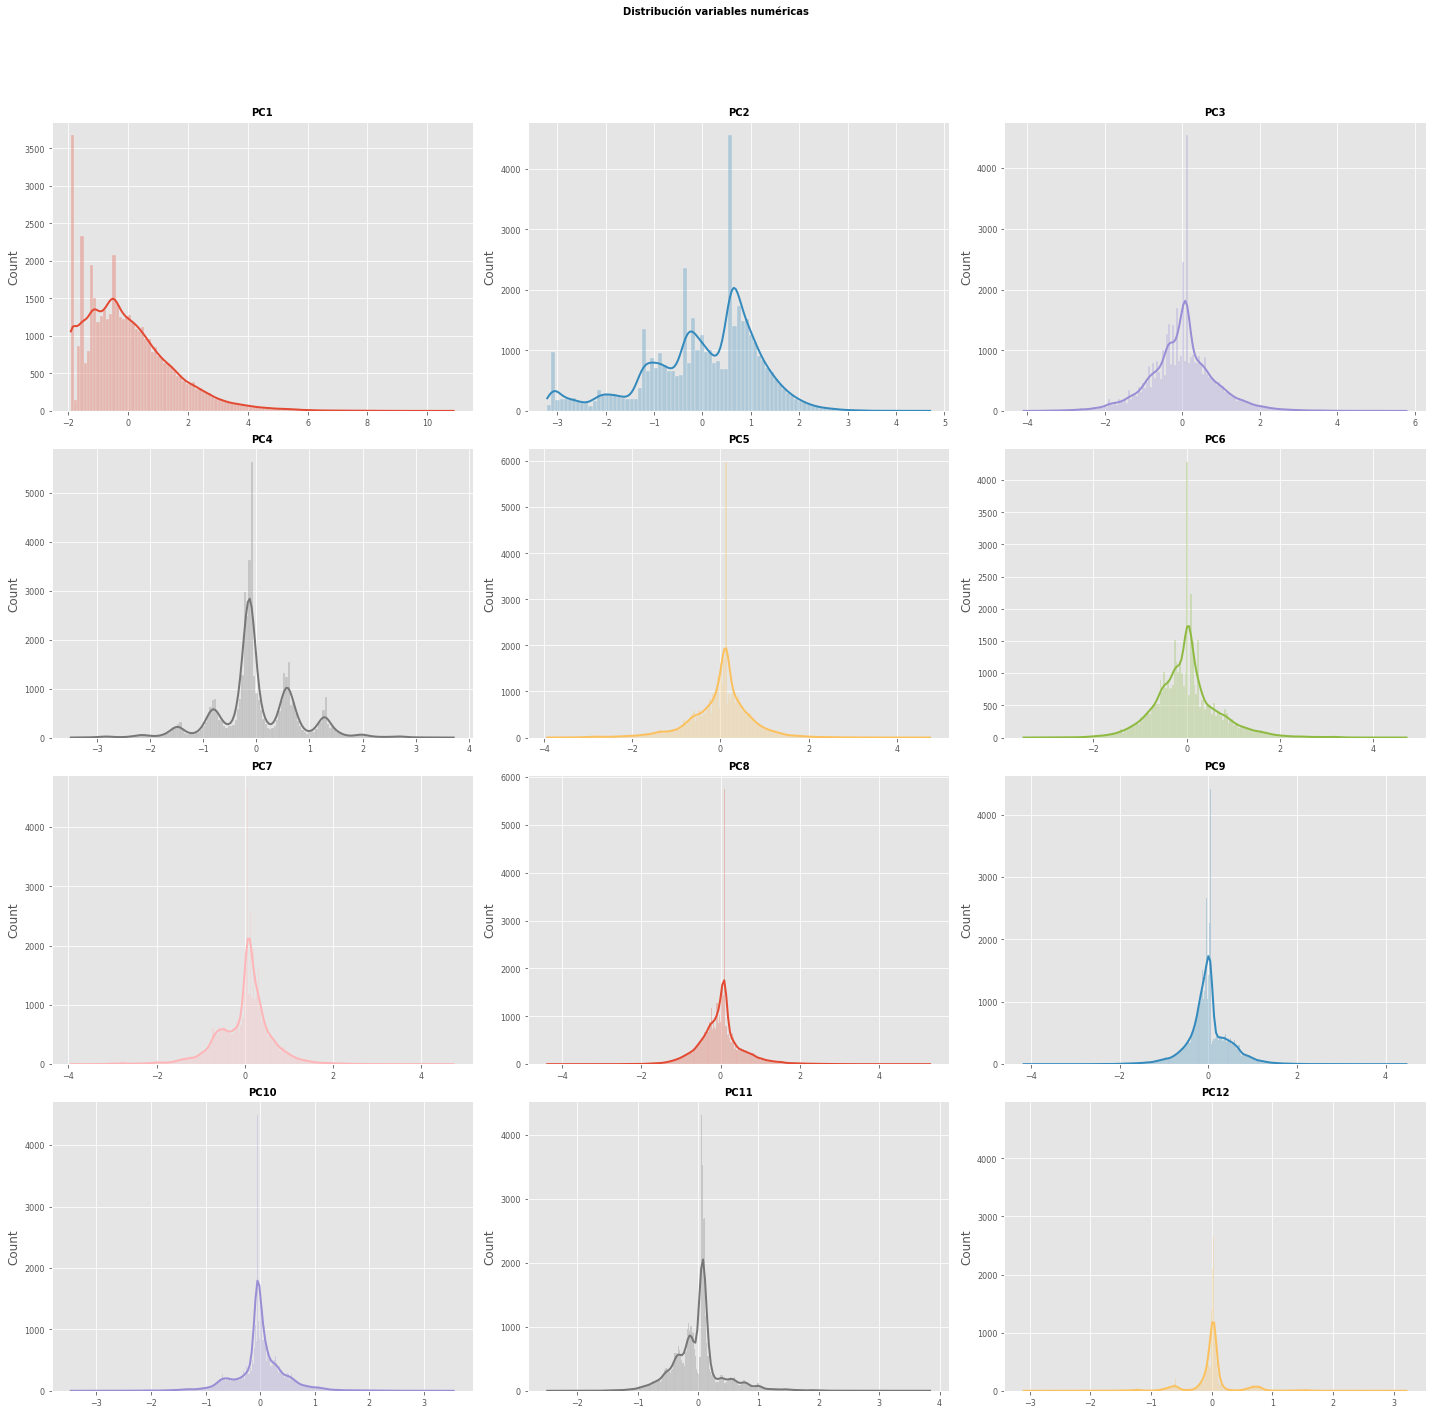

In [23]:
# Gráfico de distribución para cada componente
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = pca_df.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
        sns.histplot(
            data    = pca_df,
            x       = colum,
            stat    = "count",
            kde     = True,
            color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
            line_kws= {'linewidth': 2},
            alpha   = 0.3,
            ax      = axes[i]
        )
        axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
        axes[i].tick_params(labelsize = 8)
        axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [24]:
pca_df.corr().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
PC1,1.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
PC2,0.000,1.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000
PC3,-0.000,0.000,1.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000
PC4,-0.000,0.000,-0.000,1.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000
PC5,-0.000,-0.000,-0.000,0.000,1.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000
PC6,0.000,0.000,0.000,0.000,-0.000,1.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000
PC7,0.000,-0.000,0.000,0.000,-0.000,-0.000,1.000,0.000,0.000,0.000,-0.000,0.000
PC8,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
PC9,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,1.000,-0.000,-0.000,-0.000
PC10,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,1.000,-0.000,-0.000


todos los vectores son ortogonales, por ende, no hay correlación entre ellos

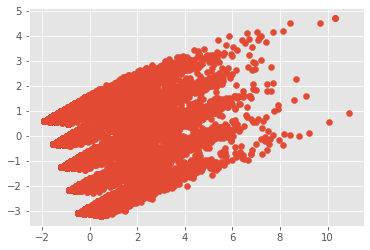

In [25]:
plt.scatter(pca_df['PC1'],pca_df['PC2'])

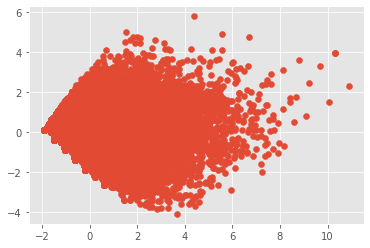

In [26]:
plt.scatter(pca_df['PC1'],pca_df['PC3'])

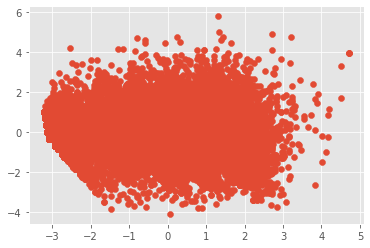

In [27]:
plt.scatter(pca_df['PC2'],pca_df['PC3'])

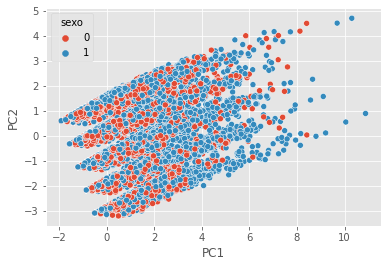

In [28]:

pca_df['sexo'] = 0
pca_df['sexo'] = np.where(junaeb2['sexo'] > 0, 1, pca_df['sexo'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='sexo')

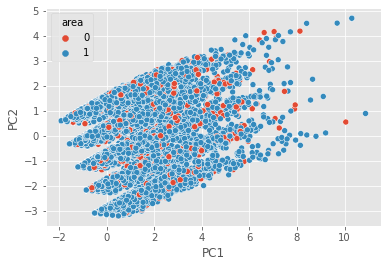

In [29]:

pca_df['area'] = 0
pca_df['area'] = np.where(junaeb2['area'] > 0, 1, pca_df['area'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='area')

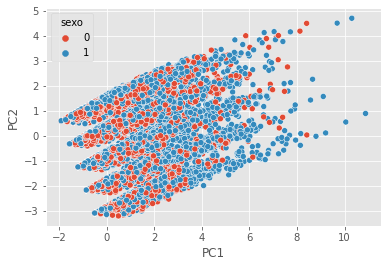

In [30]:

pca_df['sexo'] = 0
pca_df['sexo'] = np.where(junaeb2['sexo'] > 0, 1, pca_df['sexo'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='sexo')

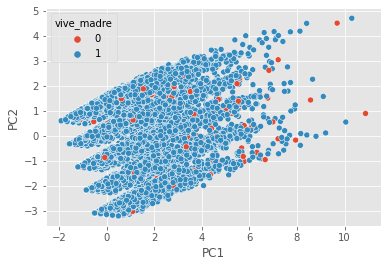

In [31]:


pca_df['vive_madre'] = 0
pca_df['vive_madre'] = np.where(junaeb2['vive_madre'] > 0, 1, pca_df['vive_madre'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='vive_madre')

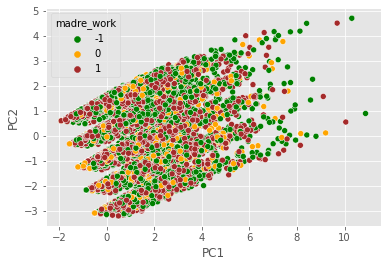

In [32]:


pca_df['madre_work'] = 0
pca_df['madre_work'] = np.where(junaeb2['madre_work'] == 1, 1, pca_df['madre_work'])
pca_df['madre_work'] = np.where(junaeb2['madre_work'] == -1, -1, pca_df['madre_work'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='madre_work',palette=['green','orange','brown'])

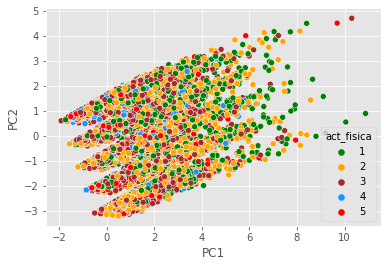

In [33]:
pca_df['act_fisica'] = 0
pca_df['act_fisica'] = np.where(junaeb2['act_fisica'] == 1, 1, pca_df['act_fisica'])
pca_df['act_fisica'] = np.where(junaeb2['act_fisica'] == 2, 2, pca_df['act_fisica'])
pca_df['act_fisica'] = np.where(junaeb2['act_fisica'] == 3, 3, pca_df['act_fisica'])
pca_df['act_fisica'] = np.where(junaeb2['act_fisica'] == 4, 4, pca_df['act_fisica'])
pca_df['act_fisica'] = np.where(junaeb2['act_fisica'] == 5, 5, pca_df['act_fisica'])

sns.scatterplot('PC1', 'PC2', data=pca_df, hue='act_fisica', palette=['green','orange','brown','dodgerblue','red'], legend='full')

 se puede observar que no existen diferencias significativas entre grupos ya que no se observa claramente una separación entre ellos con respecto a ambos ejes.

In [34]:
## Si normalizamos los datos
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(var_sk)
df_mean_norm.describe()

,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,sk9,sk10,sk11,sk12,sk13
count,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04,4.450200e+04
mean,-2.203382e-16,-1.130431e-16,2.746244e-17,1.967077e-16,9.005126e-17,-1.545561e-16,1.181524e-16,9.611854e-17,-3.257173e-17,1.085724e-16,1.251776e-16,7.791669e-17,-3.704236e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.802821e-01,-5.909847e-01,-4.418237e-01,-4.363679e-01,-4.731034e-01,-6.571768e-01,-1.017012e+00,-6.635656e-01,-4.929530e-01,-9.089731e-01,-5.701283e-01,-6.221762e-01,-7.001705e-01
25%,-2.802821e-01,-5.909847e-01,-4.418237e-01,-4.363679e-01,-4.731034e-01,-6.571768e-01,-1.017012e+00,-6.635656e-01,-4.929530e-01,-9.089731e-01,-5.701283e-01,-6.221762e-01,-7.001705e-01
50%,-2.802821e-01,-5.909847e-01,-4.418237e-01,-4.363679e-01,-4.731034e-01,-6.571768e-01,-1.950464e-01,-6.635656e-01,-4.929530e-01,1.645135e-01,-5.701283e-01,-6.221762e-01,-7.001705e-01
75%,-2.802821e-01,9.636645e-01,-4.418237e-01,-4.363679e-01,-4.731034e-01,7.150868e-01,6.269191e-01,5.462339e-01,-4.929530e-01,1.645135e-01,9.619882e-01,6.431599e-01,3.220724e-01
max,1.050494e+01,5.627612e+00,6.566567e+00,6.742650e+00,6.679015e+00,4.831877e+00,2.270850e+00,4.175633e+00,5.690950e+00,3.384973e+00,5.558338e+00,4.439168e+00,3.388801e+00


In [35]:
pca = PCA(n_components=12)
pca_features = pca.fit_transform(df_mean_norm)
print(pca.explained_variance_ratio_)

[0.30723333 0.10439201 0.08525126 0.07644979 0.06046924 0.05518055
 0.05428047 0.05360694 0.0470409  0.04059575 0.03990748 0.03872587]


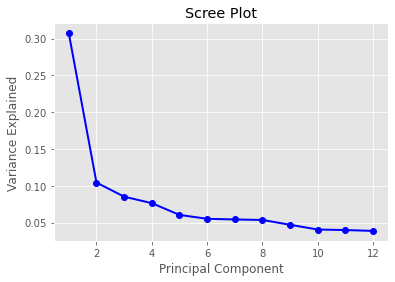

In [36]:
#scree plot using explained variance proportion

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [37]:
##Criterio MLE
pca = PCA(n_components='mle')
pca_features = pca.fit_transform(df_mean_norm)
print(pca.explained_variance_ratio_)

[0.30723333 0.10439201 0.08525126 0.07644979 0.06046924 0.05518055
 0.05428047 0.05360694 0.0470409  0.04059575 0.03990748 0.03872587]


In [38]:
pca_vectors = pd.DataFrame(data = pca.components_,
                          columns=df_mean_norm.columns,
                          index=["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
pca_vectors

,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,sk9,sk10,sk11,sk12,sk13
PC1,0.276396,0.320327,0.290478,0.318288,0.298207,0.266387,0.102880,0.261728,0.290988,0.263789,0.328251,0.258510,0.259810
PC2,0.303647,0.304357,0.266466,0.293335,0.210307,0.169534,0.104508,-0.025635,-0.232208,-0.391483,-0.321866,-0.380438,-0.343594
PC3,0.278695,0.040759,0.361099,0.311443,-0.370486,-0.445549,-0.431793,-0.389571,0.061267,0.022102,0.053263,0.069763,0.085723
PC4,0.242956,0.049335,-0.059993,-0.011397,-0.344622,-0.001792,0.785706,-0.405200,-0.009870,0.168797,0.059478,-0.022725,0.043338
PC5,-0.125028,-0.280401,0.146920,0.099917,-0.048960,-0.092096,0.153541,0.073324,0.654697,-0.230635,0.236136,-0.046923,-0.542736
PC6,0.467324,0.240568,-0.350315,-0.190897,-0.045399,-0.520090,0.010475,0.472016,0.056328,0.085247,0.080103,-0.194923,-0.119411
PC7,0.123061,0.155605,-0.238702,-0.125883,-0.016727,0.405329,-0.348906,-0.335932,0.182668,0.452092,0.144906,-0.386947,-0.283160
PC8,0.268908,0.192465,-0.288504,-0.164731,0.021957,0.153719,-0.118441,-0.213515,-0.062996,-0.335874,0.094216,0.688150,-0.311993
PC9,0.193620,0.006029,-0.230737,-0.103294,-0.072817,0.186780,-0.078231,-0.103619,0.463023,-0.507390,-0.109843,-0.222359,0.555136
PC10,-0.470616,0.677968,0.162376,-0.275631,-0.022319,-0.179493,0.043626,-0.134987,0.016024,-0.196818,0.329875,-0.121127,0.034897


In [39]:
pca_df = pd.DataFrame(data=pca_features,columns=['PC1', 'PC2', 'PC3',"PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11","PC12"])
pca_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
count,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000,44502.000
mean,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000
std,1.999,1.165,1.053,0.997,0.887,0.847,0.840,0.835,0.782,0.726,0.720,0.710
min,-2.042,-8.224,-6.875,-5.240,-5.077,-5.961,-4.743,-4.818,-5.190,-6.107,-5.358,-4.833
25%,-1.471,-0.592,-0.595,-0.630,-0.451,-0.415,-0.485,-0.471,-0.435,-0.377,-0.368,-0.306
50%,-0.535,0.141,0.126,-0.080,0.100,0.058,0.032,0.039,0.066,-0.013,0.101,-0.034
75%,0.858,0.553,0.584,0.659,0.385,0.349,0.475,0.372,0.358,0.283,0.309,0.374
max,19.428,9.805,9.674,5.408,6.525,7.434,5.236,5.599,5.430,6.454,6.633,5.064


# EFA

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.linalg import eigh, cholesky
from scipy.stats import norm
import linearmodels.panel as lmp
from pylab import plot, show, axis, subplot, xlabel, ylabel, grid
import semopy 
import seaborn as sns
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

%matplotlib inline

 Ser egoista modificamos sus valores  ya que Si una carateristica es negativa debe ser invertida en la escala, de tal forma que todas las variables representen aspectos positivos.

In [41]:

## Ser egoista modificamos sus valores 
var_sk["sk7"].replace(4,2,inplace=True)
var_sk["sk7"].replace(5,1,inplace=True)
var_sk["sk7"].replace(2,4,inplace=True)
var_sk["sk7"].replace(1,5,inplace=True)


In [42]:
fa = FactorAnalyzer(rotation='promax')
fa.fit(var_sk)

FactorAnalyzer(rotation_kwargs={})

In [43]:
#Indica que factores pesan y en que dirección
fa.loadings_


efa_vectors = pd.DataFrame(data = fa.loadings_,
                          index=["sk1","sk2","sk3","sk4","sk5","sk6","sk7","sk8","sk9","sk10","sk11","sk12","sk13"])
efa_vectors

,0,1,2
sk1,0.016223,0.606457,-0.041318
sk2,-0.022246,0.493310,0.227285
sk3,0.025796,0.637033,-0.038952
sk4,-0.004842,0.738683,-0.025207
sk5,-0.176251,0.002683,0.884808
sk6,0.015135,0.072977,0.474201
sk7,-0.130063,-0.002210,-0.080738
sk8,0.147399,-0.087711,0.499505
sk9,0.486060,0.097721,0.017551
sk10,0.641346,-0.043450,-0.049517


El numero optimo de factores son 3

In [44]:
fa.get_eigenvalues()

(array([3.99962771, 1.35620325, 1.09229343, 0.98183971, 0.78110224,
        0.73386953, 0.71649271, 0.69706082, 0.61100148, 0.5286527 ,
        0.51829849, 0.50466929, 0.47888864]),
 array([ 3.41023023,  0.78599957,  0.60789792,  0.17836043,  0.09858874,
         0.06858721,  0.03691868,  0.00593339, -0.02781041, -0.05358291,
        -0.07616187, -0.09948733, -0.17644849]))

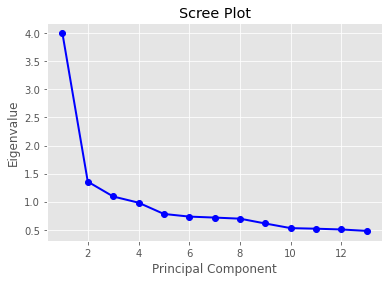

In [45]:
values = np.arange(1,14)
eigenvalues = pd.DataFrame(data=fa.get_eigenvalues())
plt.plot(values, eigenvalues.loc[0], 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

In [46]:
#matriz de varianza-covarianza
#3 elementos: 
#-varianza de forma cruda
#-proporcion explicada de cada factor
#-proporción acumulada

fa.get_factor_variance()

(array([1.8453857 , 1.5895295 , 1.32410995]),
 array([0.14195275, 0.1222715 , 0.10185461]),
 array([0.14195275, 0.26422425, 0.36607886]))

In [47]:
print(semopy.efa.explore_cfa_model(var_sk, pval=0.05))

eta1 =~ sk11 + sk9 + sk10 + sk12
eta2 =~ sk4 + sk2 + sk5 + sk3 + sk1 + sk6 + sk8
eta3 =~ sk2 + sk6 + sk10 + sk7



In [48]:
efa_vectors

,0,1,2
sk1,0.016223,0.606457,-0.041318
sk2,-0.022246,0.493310,0.227285
sk3,0.025796,0.637033,-0.038952
sk4,-0.004842,0.738683,-0.025207
sk5,-0.176251,0.002683,0.884808
sk6,0.015135,0.072977,0.474201
sk7,-0.130063,-0.002210,-0.080738
sk8,0.147399,-0.087711,0.499505
sk9,0.486060,0.097721,0.017551
sk10,0.641346,-0.043450,-0.049517


Se utilizara la matriz de pesos de cada factor donde cada variable pertenece a un solo factor y se decide a que factor mediante la variable que tenga mas peso sobre el factor, asi se tiene  siguiente modelo :

eta1 =~ sk11 + sk9 + sk10 + sk7 + sk12 + sk13

eta2 =~ sk4 + sk2 + sk3 + sk1 + sk6 

eta3 =~ sk6 + sk5 + sk8

#  General CFA

In [49]:
Xf = var_sk

mod = """
# measurement model
eta1 =~ sk11 + sk9 + sk10 + sk7 + sk12 + sk13
eta2 =~ sk4 + sk2 + sk3 + sk1 
eta3 =~ sk5 + sk8 + sk6 
    """

model = semopy.Model(mod) #se entrega el modelo
out=model.fit(Xf) 
print(out)

#output
#tipo de función utilizada 
#algoritmo de optimización
#valor final de la función
#numero de iteraciones
#parametros igual a los pesos relativos
#para cada factor hay un parametro estimado

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.156
Number of iterations: 35
Params: 0.796 1.120 -0.305 0.914 1.081 1.078 0.914 0.561 1.136 1.010 0.699 0.151 0.200 0.475 0.160 0.592 0.440 0.090 0.239 0.590 0.279 0.205 0.366 0.221 0.108 0.110 0.162 0.150 0.102


In [50]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,sk11,~,eta1,1.000000,0.719789,-,-,-
1,sk9,~,eta1,0.796146,0.578252,0.007979,99.777867,0.0
2,sk10,~,eta1,1.120498,0.565192,0.011443,97.92038,0.0
3,sk7,~,eta1,-0.305009,-0.183069,0.00905,-33.703474,0.0
4,sk12,~,eta1,0.914277,0.543503,0.00965,94.748434,0.0
5,sk13,~,eta1,1.080755,0.518964,0.01187,91.04675,0.0
6,sk4,~,eta2,1.000000,0.695728,-,-,-
7,sk2,~,eta2,1.078383,0.649815,0.009951,108.371458,0.0
8,sk3,~,eta2,0.913827,0.620692,0.008717,104.82871,0.0
9,sk1,~,eta2,0.561322,0.586646,0.005595,100.323096,0.0


In [51]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,62,78,6920.382288,0.0,120036.27426,0.942827,0.942348,0.92747,0.942348,0.928073,0.049857,57.688986,310.084378,0.155507


eta3 tenga como nombre = sociable
- sk5: juega con otros (1: siempre - 5: nunca)
- sk6: comparte sus cosas con otros (1: siempre - 5: nunca                            
- sk8: participa en juegos grupales (1: siempre - 5: nunca)

eta1 tenga como nombre = creatividad

- sk9: hace preguntas a adultos (1: siempre - 5: nunca)
- sk10: tiene interes por libros (1: siempre - 5: nunca)
- sk11: tiene interes por su entorno (1: siempre - 5: nunca)
- sk12: juega a armar y desarmar cosas (1: siempre - 5: nunca)
- sk13: tiene expresiones artisticas (1: siempre - 5: nunca)
- sk7: es agresivo (1: siempre - 5: nunca)

eta2 tenga como nombre = inteligencia emocional
 
- sk1: muestra afecto a padres (1: siempre - 5: nunca)
- sk2: muestra afecto a sus pares (1: siempre - 5: nunca)
- sk3: expresa sus sentimientos (1: siempre - 5: nunca)
- sk4: usa gestos para mostrar sentimientos (1: siempre - 5: nunca)

# Complete sem

In [52]:
# incluyendo imce, act_fisica y area
var_sk["sexo"] = junaeb2["sexo"].copy()
var_sk["imce"] = junaeb2["imce"].copy()
var_sk["act_fisica"] = junaeb2["act_fisica"].copy()
var_sk["area"] = junaeb2["area"].copy()

In [53]:
mod = """
# measurement model
act_fisica =~ sexo + imce + area  
creatividad =~ sk11 + sk9 + sk10 + sk7 + sk12 + sk13
inteligencia_emocional =~ sk4 + sk2 + sk3 + sk1 
sociable =~ sk5 + sk8 + sk6 
#regression 
act_fisica ~ creatividad + inteligencia_emocional + sociable
    """

model = semopy.Model(mod) #se entrega el modelo
out=model.fit(Xf) 
print(out)

Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.259
Number of iterations: 47
Params: 0.414 -0.016 0.798 1.152 -0.319 0.915 1.130 1.080 0.914 0.562 1.137 1.011 0.216 0.013 -0.077 1.062 0.105 0.683 0.151 0.200 0.136 0.475 0.160 0.591 0.444 0.090 0.239 0.582 0.281 0.087 0.211 0.366 0.215 0.108 0.107 0.161 0.102 0.150


In [54]:
model.inspect(mode='list', what="names", std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,act_fisica,~,creatividad,0.215855,0.298152,0.008979,24.04014,0.0
1,act_fisica,~,inteligencia_emocional,0.012928,0.014922,0.012035,1.07416,0.282751
2,act_fisica,~,sociable,-0.076654,-0.091760,0.012093,-6.338814,0.0
3,sexo,~,act_fisica,1.000000,0.672973,-,-,-
4,imce,~,act_fisica,0.414351,0.133732,0.066084,6.270041,0.0
5,area,~,act_fisica,-0.016124,-0.018323,0.006519,-2.473441,0.013382
6,sk11,~,creatividad,1.000000,0.710202,-,-,-
7,sk9,~,creatividad,0.798190,0.572032,0.008103,98.506268,0.0
8,sk10,~,creatividad,1.152362,0.573503,0.011674,98.713169,0.0
9,sk7,~,creatividad,-0.318844,-0.188825,0.009178,-34.738435,0.0


In [55]:
semopy.calc_stats(model)

,DoF,DoF Baseline,chi2,chi2 p-value,chi2 Baseline,CFI,GFI,AGFI,NFI,TLI,RMSEA,AIC,BIC,LogLik
Value,98,120,11525.011114,0.0,125976.114565,0.909206,0.908514,0.887977,0.908514,0.888823,0.051188,75.482045,406.207043,0.258977


Se puede apreciar que las latentes creatividad y sociable tienen valor p inferior a 5% por lo que son significativas para el modelo de regression que tiene como variable dependiente act_fisica. por otro lado inteligencia emocional no es significativa para el modelo de regresion.


La creatividad tiene el coeficiente más alto 0.215855, lo que significa que un cambio en la creatividad tendrá el mayor impacto en la actividad fisica. Un aumento en la variable latente creatividad tiene un impacto positivo en la actividad fisica.

La variable latente sociable tiene el coeficiente -0.076654 , lo que significa que un cambio en la  variable latente sociable tendrá un impacto en la actividad fisica. es decir un aumento en la variable latente sociable tiene un impacto negativo en la actividad fisica.


